# Support vector Machines 

Support vector machine (SVM) is among the most widely used machine learning technique for classification, and regression problems. Support vector regression (SVR) is a component of SVM, and uses regression to resolve problems in quadratic programming 

Further reading on SVM see reference by; Cortes, C., and Vapnik, V., 1995. Support-vector networks. Mach. Learn. 20, 273–297

## Import various libraries

In [37]:
#library for data analsysis
import numpy as np

# library to handle data in a vectorized manner
import pandas as pd

## Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

# To access statistics functions
import scipy.stats as ss

# Import support vector machines regression function 
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# To compute the square root function 
from math import sqrt

# Optinal, but execution of this command ensures the plot displayed directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
%matplotlib inline
import matplotlib
font = {'family' : 'Times new Roman',
        'size'   : 15}

matplotlib.rc('font', **font)

## Load Data

In [38]:
df = pd.read_csv('Diet_R.csv')
df.head(5)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,0,41,171,60,2,60.0
1,26,0,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [39]:
X = df.iloc[:, 1:6]
Y = np.asarray(df.iloc[:, 6]).reshape(-1,1)
print (X) # show the selected variables

    gender  Age  Height  pre.weight  Diet
0        0   41     171          60     2
1        0   32     174         103     2
2        0   22     159          58     1
3        0   46     192          60     1
4        0   55     170          64     1
..     ...  ...     ...         ...   ...
73       1   35     183          83     3
74       1   49     177          84     3
75       1   28     164          85     3
76       1   40     167          87     3
77       1   51     175          88     3

[78 rows x 5 columns]


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)

In [41]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)

Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

In [43]:
#Different kernels such Gaussian, linear, polynomial functions, linear, Gaussian, Sigmoid, logistic kernels, etc
# hyper parameter of regulation value (C), epsilon ad gamma 

svm = SVR(kernel='linear', C=1, epsilon=0.1, gamma=10)

# Train the SVR on the training data 
svm.fit(X_train, Y_train)

#Kernels=linear,poly,rbf,sigmoid
#scores = cross_val_score(clf,X, y, cv=5)
#scores

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
#Predict the values of using the developed function  
Pred=svm.predict(X_train)
Pred1=svm.predict(X_test)


Standard deviation between the predicted and actual values 

In [45]:
s1=np.std(Pred1)
s=np.std(Y_test)
[s1, s]

[0.9038438749185916, 1.0]

## Determine the generalization and predictin error

In [46]:
svm.score(X_train,Y_train)

0.938587003716399

In [47]:
svm.score(X_test,Y_test)

0.898679357987247

In [48]:
def RMSE(dataset_pred, dataset_obs):
    p = 0
    for i in range(len(dataset_pred)):
        u = (dataset_obs[i] - dataset_pred[i])
        p += u*u
    #rmse = #np.round((np.sqrt(p)/(len(dataset_obs))), 2)
    rmse= sqrt(p/(len(dataset_obs)))
    return rmse

def MAE(dataset_pred, dataset_obs):
    p = 0
    for i in range(len(dataset_pred)):
        u = abs(dataset_obs[i] - dataset_pred[i])
        p += u
    mae = p/(len(dataset_obs))
    return mae

def NSE(dataset_pred, dataset_obs):
    p1 = 0
    p2 = 0
    for i in range(len(dataset_pred)):
        u1 = (dataset_obs[i] - dataset_pred[i])**2
        u2 = (dataset_obs[i] - np.mean(dataset_obs))**2
        p1 += u1
        p2 += u2
    nse = 1 - (p1/p2)        
    return nse 

def MSE(dataset_pred, dataset_obs):
    p = 0
    for i in range(len(dataset_pred)):
        u = (dataset_obs[i] - dataset_pred[i])**2
        p += u
    mse = (p/len(dataset_obs))
    return mse

## Mean absolute error

In [49]:
MAE_train = MAE(Pred, Y_train)
MAE_test = MAE(Pred1, Y_test)

[MAE_train, MAE_test]

[0.1918249343723528, 0.2558476837546515]

## Root mean squared error

In [50]:
RMSE_train = RMSE(Pred, Y_train)
RMSE_test = RMSE(Pred1, Y_test)

[RMSE_train, RMSE_test]

[0.24781645684578943, 0.3183090353928914]

## Correlation coefficient

In [51]:
_,_,r_train,_,_ = ss.linregress(Y_train, Pred)
_,_,r_test,_,_ = ss.linregress(Y_test, Pred1)

[r_train, r_test]

[0.9691776049564138, 0.9490757702423023]

## Nash Sutcliffe efficiency

In [52]:
NSE_train = NSE(Pred, Y_train)
NSE_test = NSE(Pred1, Y_test)

[NSE_train, NSE_test]

[0.938587003716399, 0.898679357987247]

In [16]:
np.savetxt("LSPredRBF.csv",Pred1,delimiter =",")

## Data visualisation 

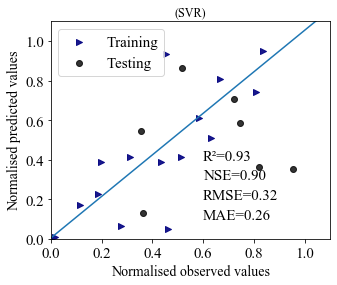

In [53]:
#Define the size of the figure
plt.figure(figsize=(5,4))

# Define the color, label, marker
plt.scatter(Pred,Y_train, alpha=0.9, color='navy',marker='>',label='Training')
plt.scatter(Pred1,Y_test, alpha=0.8, color='black', marker='o',label='Testing')

# Define the position of legend
plt.legend(loc='upper left')

r_squared=0.93
NSE=0.90
RMSE=0.32
MAE=0.26

## Define the name, fontsize of x and y axis labels,
plt.ylabel('Normalised predicted values', fontname='times new roman', fontsize=14)
plt.xlabel('Normalised observed values', fontname='times new roman', fontsize=14)

# # Set the limits fir x and y axis 
plt.xlim(0.0,1.1)
plt.ylim(0.0,1.1)

#Define the title of the table, position and sise
plt.title('(SVR)', fontname='times new roman', fontsize=12)

#Plot the scatter diagram showing the data generalization of the models
plt.plot(np.unique(Y_test),np.poly1d(np.polyfit(Pred1,Y_test, 1))(np.unique(Y_test)))
#plt.plot(np.unique(Y_train),np.poly1d(np.polyfit(RFR_pred_train_ZPT,Y_train, 1))(np.unique(Y_train)))

# Define the position of R2, NSE, RMSE, MAE within the scater plot diagram
plt.text(0.6,0.4, 'R²=%0.2f'%r_squared)
plt.text(0.6,0.3, 'NSE=%0.2f'%NSE)
plt.text(0.6,0.2, 'RMSE=%0.2f'%RMSE)
plt.text(0.6,0.1, 'MAE=%0.2f'%MAE)
plt.show()
